# Median Filters

Полученные изображения были сравнены и было подтверждено, что все три алгоритма генерируют одно и то же изображение при фиксированном размере фильтра.

In [10]:
import json

file = open("tmp")
data = json.load(file)
filter_sizes = data.keys()
file.close()

In [ ]:
# !pip install matplotlib

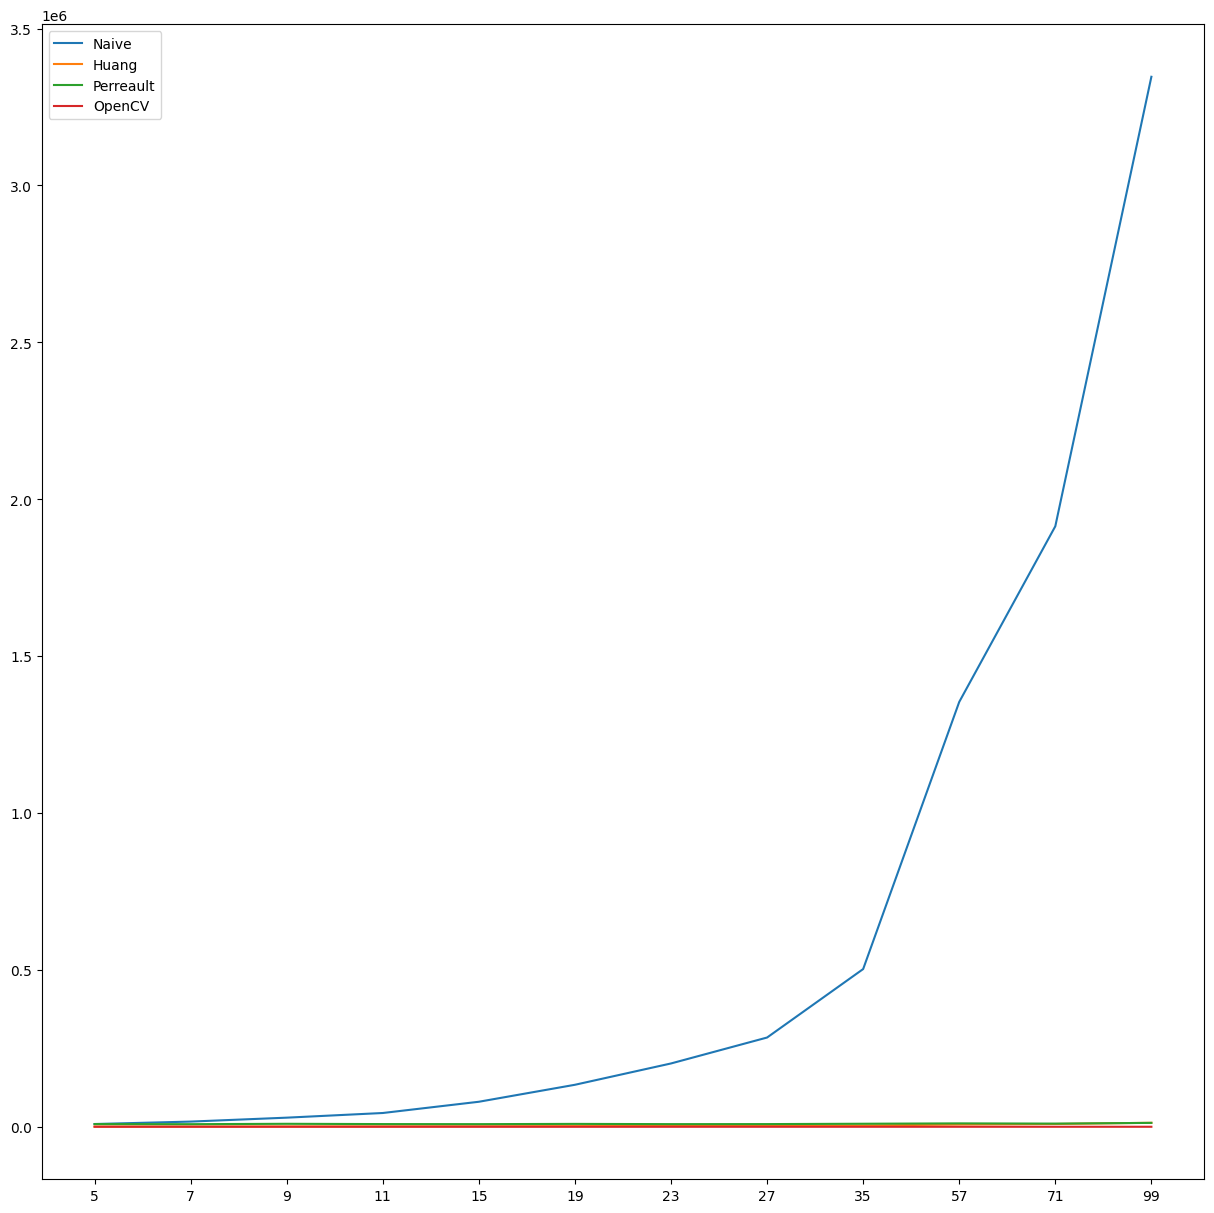

In [11]:
from matplotlib import pyplot as plt

labels = ["Naive", "Huang", "Perreault", "OpenCV"]

plt.figure( figsize=(15, 15))

for idx in range(len(labels)):
    dots = [data[time][idx] for time in data]
    plt.plot(filter_sizes, dots, label=labels[idx])

plt.legend()
plt.show()

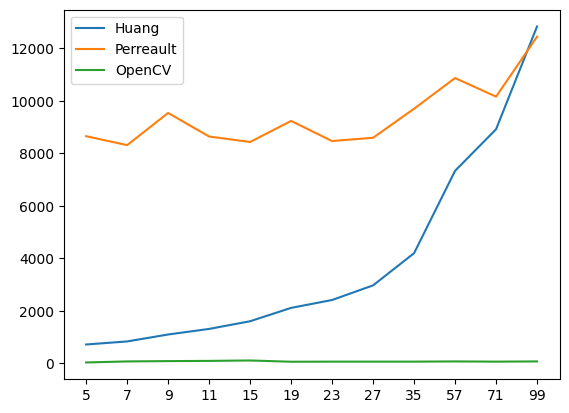

In [14]:
left = 1
for idx in range(len(labels[left:])):
    dots = [data[time][idx + left] for time in data]
    plt.plot(filter_sizes, dots, label=labels[idx + left])
plt.legend()
plt.show()

График выше построен в единицах мс/Мпиксель.

# Асимптотика

Пусть размер изображения $M * N$ пикселей, размер фильтра - $R$. 

## Наивный алгоритм
Данный алгоритм считает на каждой итерации медиану при помощи сортировки массива из пикселей. Для этого используется $R^2$ пикселей. Поэтому затраты по памяти $O(R^2)$. Так как на каждой итерации необходимо отсортировать массив из $R^2$ пикселей, асимптотика составит $O(R^2logR)$, что приблизительно соответствует графику.
N.B. Заметим на полях, что можно было бы использовать сортировку подсчётом. Тогда сложность составила бы $O(R^2)$, но потребовалась бы дополнительная память.

## Huang filter
Поддерживаем гистограммы для поиска медианы размера $3 * 4 * 256$ байт, то есть не зависит от $R$. Отсюда дополнительные затраты памяти составляют $O(1)$. На каждой итерации алгоритма, нужно учесть крайний левый старый столбец и крайний правый новый, длина каждого $R$, поэтому сложность алгоритма составит $O(R)$, что также соответствует графику. Заметим, что обновление медианы происходит за константное время (так как мы имеем константное количество бакетов).

## Perreault filter
Поддерживаем гистограммы окна, как в предыдущем алгоритме, и к тому же запоминаем гистограммы $M$ столбцов, каждая занимает $3 * 4 * 256$ байт. Отсюда сложность по памяти так же константная. Алгоритмическая сложность работы составит $O(1)$, так как на каждой итерации мы только обновляем гистограмму правого столбца (рассматриваем только два пикселя), "вычитаем" из гистограммы окна гистограмму левого столбца и "добавляем" гистограмму правого. Так как все операции с гистограммами требуют константного количества бакетов, то и алгоритмическая сложность $O(1)$. Заметим, однако, что на операции с гистограммой требуют прохода по массиву длины $256$ пикселей, что довольно внушительно. Поэтому на графике этот алгоритм почти не увеличивает своё время работы, однако константа довольно весома. Заметим, однако, что сложность всё-таки немного растёт. Это происходит потому, что, во-первых, размер паддинга равен $R/2$ с каждой стороны, во-вторых, потому что при переходе на новую строку мы заново считаем текущую медиану. На это уходит $O(R^2logR)$ времени.

## Применение

По графикам выше можно сказать, что лучше всего использовать алгоритм из библиотеки OpenCV. Если выбирать из остальных, то при $R < 90$ стоит отдать предпочтение алгоритму Huang. Хотя его асимптотика и хуже алгоритма Perreault, у последнего слишком большая константа. 

## Вывод

Основываясь только на теоретической оценке может показаться, что последний алгоритм использовать приоритетнее, чем предыдущие, однако, это не всегда так. Основываясь на графиках можно определить, какой алгоритм когда лучше использовать.